In [1]:
! pip  install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 34.6 MB/s eta 0:00:00


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data_extract_path = "/content/data"

In [9]:
data_extract_path = "/content/drive/MyDrive/Colab Notebooks/data"

In [10]:
import os
import zipfile
import numpy as np
import cv2
import rasterio
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming the zip file is in Google Drive
data_zip_path = "/content/drive/MyDrive/data.zip"
data_extract_path = "/content/drive/MyDrive/data"

# Create the extraction directory if it doesn't exist
os.makedirs(data_extract_path, exist_ok=True)

# Check if the zip file exists
if os.path.exists(data_zip_path):
    print(f"Zip file found at: {data_zip_path}")

    try:
        with zipfile.ZipFile(data_zip_path, 'r') as zip_ref:
            print("Zip file opened successfully.")
            print("Contents of the zip file:")
            for file_info in zip_ref.infolist():
                print(file_info.filename)

            zip_ref.extractall(data_extract_path)
            print("Files extracted successfully.")

    except zipfile.BadZipFile:
        print("Error: The zip file appears to be corrupted.")
    except Exception as e:
        print(f"An error occurred during extraction: {e}")

else:
    print(f"Error: Zip file not found at: {data_zip_path}")

# Update the image and label paths
image_path = os.path.join(data_extract_path, "images")
label_path = os.path.join(data_extract_path, "labels")

os.makedirs(image_path, exist_ok=True)
os.makedirs(label_path, exist_ok=True)

print("Image path:", image_path)
print("Label path:", label_path)
print("Image files:", os.listdir(image_path))
print("Label files:", os.listdir(label_path))

Zip file found at: /content/drive/MyDrive/data.zip
Zip file opened successfully.
Contents of the zip file:
data/labels/150_243.png
data/labels/148_297.png
data/labels/139_108.png
data/labels/146_84.png
data/labels/149_166.png
data/labels/145_164.png
data/labels/140_34.png
data/labels/138_39.png
data/labels/143_183.png
data/labels/137_140.png
data/labels/128_294.png
data/labels/136_301.png
data/labels/132_126.png
data/labels/135_56.png
data/labels/134_153.png
data/labels/126_110.png
data/labels/144_235.png
data/labels/121_142.png
data/labels/131_185.png
data/labels/147_213.png
data/labels/141_237.png
data/labels/142_238.png
data/labels/129_177.png
data/labels/133_224.png
data/labels/117_97.png
data/labels/118_125.png
data/labels/114_220.png
data/labels/120_305.png
data/labels/130_256.png
data/labels/123_145.png
data/labels/127_54.png
data/labels/115_49.png
data/labels/119_222.png
data/labels/125_201.png
data/labels/124_95.png
data/labels/116_250.png
data/labels/108_236.png
data/labels/1

In [11]:
IMG_SIZE = 128

def load_images_with_rasterio(image_dir, mask_dir, img_size):
    images, masks = [], []
    image_files = sorted(os.listdir(image_dir))
    mask_files = sorted(os.listdir(mask_dir))

    print(f"Found {len(image_files)} image files in {image_dir}")
    print(f"Found {len(mask_files)} mask files in {mask_dir}")

    if not image_files or not mask_files:
        print("Error: No image or mask files found in the specified directories.")
        return np.array(images), np.array(masks)

    for img_file, mask_file in zip(image_files, mask_files):
        img_path = os.path.join(image_dir, img_file)
        mask_path = os.path.join(mask_dir, mask_file)
        print(f"Loading image: {img_path}, mask: {mask_path}")

        try:
            with rasterio.open(img_path) as src:
                img = src.read([1, 2, 3])
                img = np.moveaxis(img, 0, -1)
        except Exception as e:
            print(f"Error reading image {img_path}: {e}")
            continue

        try:
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        except Exception as e:
            print(f"Error reading mask {mask_path}: {e}")
            continue

        try:
            img = cv2.resize(img, (img_size, img_size))
            mask = cv2.resize(mask, (img_size, img_size))

            img = img / 255.0
            mask = mask / 255.0

            images.append(img)
            masks.append(mask)

        except Exception as e:
            print(f"Error processing image or mask: {e}")
            continue

    print(f"Loaded {len(images)} images and {len(masks)} masks successfully.")
    return np.array(images), np.array(masks)

In [12]:
print(f"Image path: {image_path}")
print(f"Label path: {label_path}")

Image path: /content/drive/MyDrive/data/images
Label path: /content/drive/MyDrive/data/labels


In [13]:
images, masks = load_images_with_rasterio(image_path, label_path, IMG_SIZE)


Found 306 image files in /content/drive/MyDrive/data/images
Found 456 mask files in /content/drive/MyDrive/data/labels
Loading image: /content/drive/MyDrive/data/images/0.tif, mask: /content/drive/MyDrive/data/labels/0.png


/usr/local/lib/python3.11/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Loading image: /content/drive/MyDrive/data/images/1.tif, mask: /content/drive/MyDrive/data/labels/1.png
Loading image: /content/drive/MyDrive/data/images/10.tif, mask: /content/drive/MyDrive/data/labels/10.png
Loading image: /content/drive/MyDrive/data/images/100.tif, mask: /content/drive/MyDrive/data/labels/100.png
Loading image: /content/drive/MyDrive/data/images/101.tif, mask: /content/drive/MyDrive/data/labels/100_184.png
Loading image: /content/drive/MyDrive/data/images/102.tif, mask: /content/drive/MyDrive/data/labels/101.png
Loading image: /content/drive/MyDrive/data/images/103.tif, mask: /content/drive/MyDrive/data/labels/101_89.png
Loading image: /content/drive/MyDrive/data/images/104.tif, mask: /content/drive/MyDrive/data/labels/102.png
Loading image: /content/drive/MyDrive/data/images/105.tif, mask: /content/drive/MyDrive/data/labels/102_179.png
Loading image: /content/drive/MyDrive/data/images/106.tif, mask: /content/drive/MyDrive/data/labels/103.png
Loading image: /content

In [14]:
print(images)
print(masks)

[[[[0.51372549 0.18823529 0.28627451]
   [0.55686275 0.16078431 0.29019608]
   [0.55686275 0.19607843 0.34509804]
   ...
   [1.08235294 0.91764706 1.76862745]
   [1.08235294 0.94509804 1.87843137]
   [1.05490196 0.90196078 1.63137255]]

  [[0.67843137 0.45098039 0.95294118]
   [0.6        0.41176471 0.83921569]
   [0.6        0.45490196 0.84313725]
   ...
   [1.30196078 1.20392157 1.97647059]
   [1.30196078 1.0627451  1.97254902]
   [1.20784314 0.97647059 1.77647059]]

  [[0.67843137 0.5254902  1.15686275]
   [0.6        0.64705882 1.25882353]
   [0.6        0.74901961 1.34117647]
   ...
   [1.30196078 1.50588235 2.21568627]
   [1.30196078 1.45490196 2.07058824]
   [1.20784314 1.31764706 2.10588235]]

  ...

  [[0.44313725 0.42352941 1.07843137]
   [0.45882353 0.3372549  0.9372549 ]
   [0.45882353 0.32156863 0.90980392]
   ...
   [0.9372549  1.54901961 2.30196078]
   [0.9372549  0.90588235 1.63921569]
   [0.70196078 0.59607843 1.30588235]]

  [[0.44313725 0.44705882 1.04313725]
   [0.4

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(images, masks, test_size=0.2, random_state=42)


In [16]:
def build_unet_model(img_size):
    inputs = keras.Input(shape=(img_size, img_size, 3))

    c1 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(p1)
    c2 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(p2)
    c3 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(p3)
    c4 = layers.Conv2D(512, (3, 3), activation="relu", padding="same")(c4)

    u1 = layers.UpSampling2D((2, 2))(c4)
    u1 = layers.concatenate([u1, c3])
    c5 = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(u1)

    u2 = layers.UpSampling2D((2, 2))(c5)
    u2 = layers.concatenate([u2, c2])
    c6 = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(u2)

    u3 = layers.UpSampling2D((2, 2))(c6)
    u3 = layers.concatenate([u3, c1])
    c7 = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(u3)

    outputs = layers.Conv2D(1, (1, 1), activation="sigmoid")(c7)

    return keras.Model(inputs, outputs)


In [17]:
images, masks = load_images_with_rasterio(image_path, label_path, IMG_SIZE)

X_train, X_test, Y_train, Y_test = train_test_split(images, masks, test_size=0.2, random_state=42)



Found 306 image files in /content/drive/MyDrive/data/images
Found 456 mask files in /content/drive/MyDrive/data/labels
Loading image: /content/drive/MyDrive/data/images/0.tif, mask: /content/drive/MyDrive/data/labels/0.png
Loading image: /content/drive/MyDrive/data/images/1.tif, mask: /content/drive/MyDrive/data/labels/1.png
Loading image: /content/drive/MyDrive/data/images/10.tif, mask: /content/drive/MyDrive/data/labels/10.png
Loading image: /content/drive/MyDrive/data/images/100.tif, mask: /content/drive/MyDrive/data/labels/100.png
Loading image: /content/drive/MyDrive/data/images/101.tif, mask: /content/drive/MyDrive/data/labels/100_184.png
Loading image: /content/drive/MyDrive/data/images/102.tif, mask: /content/drive/MyDrive/data/labels/101.png
Loading image: /content/drive/MyDrive/data/images/103.tif, mask: /content/drive/MyDrive/data/labels/101_89.png
Loading image: /content/drive/MyDrive/data/images/104.tif, mask: /content/drive/MyDrive/data/labels/102.png
Loading image: /cont

In [18]:
# Train the model
model = build_unet_model(IMG_SIZE)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=10, batch_size=8, validation_data=(X_test, Y_test))

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 44s 817ms/step - accuracy: 0.6107 - loss: 0.1086 - val_accuracy: 0.6278 - val_loss: 0.0235
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.6869 - loss: 0.0198 - val_accuracy: 0.6278 - val_loss: 0.0235
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.7032 - loss: 0.0188 - val_accuracy: 0.6278 - val_loss: 0.0235
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.7147 - loss: 0.0180 - val_accuracy: 0.6278 - val_loss: 0.0235
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.6905 - loss: 0.0196 - val_accuracy: 0.6278 - val_loss: 0.0235
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7024 - loss: 0.0188 - val_accuracy: 0.6278 - val_loss: 0.0235
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.6834 - loss: 0.0200 - val_accuracy: 0.6278 - val_loss: 0.0235
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.6991 - loss: 0.0190 - val_accuracy: 0.6278 -

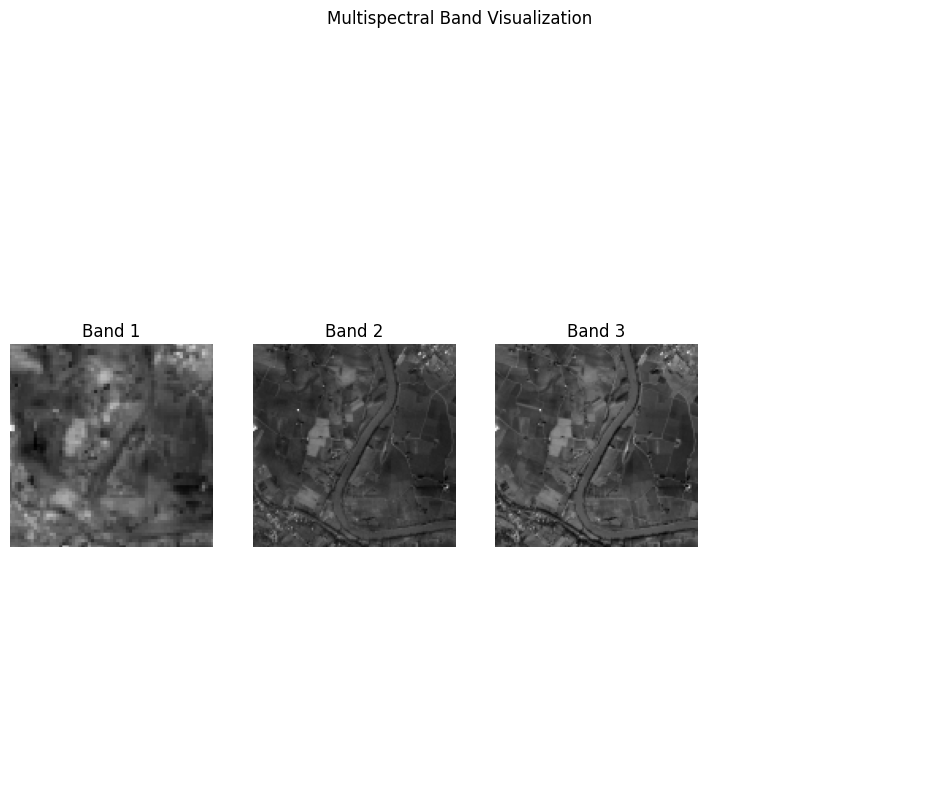

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
{'IoU': 0.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-score': 1.0}


In [45]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

def normalize_data(images):
    """Apply Min-Max Normalization to images"""
    images = images.astype(np.float32)
    images = (images - np.min(images)) / (np.max(images) - np.min(images))
    return images

def visualize_bands(image):
    """Visualize available bands of a multispectral image"""
    num_bands = image.shape[2]  # Dynamically get the number of bands
    rows = (num_bands // 4) + (num_bands % 4 > 0)  # Arrange in a grid
    fig, axes = plt.subplots(rows, 4, figsize=(12, 9))
    fig.suptitle("Multispectral Band Visualization")

    for i, ax in enumerate(axes.flat):
        if i < num_bands:
            ax.imshow(image[:, :, i], cmap='gray')
            ax.set_title(f'Band {i+1}')
            ax.axis('off')
        else:
            ax.axis('off')  # Hide extra subplots

    plt.show()

def iou_metric(y_true, y_pred):
    """Calculate Intersection over Union (IoU)"""
    intersection = np.logical_and(y_true, y_pred).sum()
    union = np.logical_or(y_true, y_pred).sum()
    return intersection / union if union != 0 else 0

def evaluate_model(model, X_test, Y_test, threshold=0.3):
    """Evaluate model using IoU, Precision, Recall, and F1-score"""
    y_pred = model.predict(X_test)
    y_pred = (y_pred > threshold).astype(int)  # Convert predictions to binary

    # Ensure Y_test is also binary
    Y_test = (Y_test > 0.5).astype(int)

    iou_scores = [iou_metric(y_t, y_p) for y_t, y_p in zip(Y_test, y_pred)]
    iou = np.mean(iou_scores)
    precision = precision_score(Y_test.flatten(), y_pred.flatten(), zero_division=1)
    recall = recall_score(Y_test.flatten(), y_pred.flatten(), zero_division=1)
    f1 = f1_score(Y_test.flatten(), y_pred.flatten(), zero_division=1)

    return {
        'IoU': iou,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

# Example usage:
X_train = normalize_data(X_train)
X_test = normalize_data(X_test)
visualize_bands(X_test[0])  # Example visualization
metrics = evaluate_model(model, X_test, Y_test)
print(metrics)
